# Dataset Information
This datasets contains 8732 labeled sounds of Urban Sounds from 10 classes:

0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the datasets

import numpy as np
X_train=np.load('/content/drive/MyDrive/Colab_Notebooks/UrbanSound/X_train.npy')
y_train=np.load('/content/drive/MyDrive/Colab_Notebooks/UrbanSound/y_train.npy')
X_val=np.load('/content/drive/MyDrive/Colab_Notebooks/UrbanSound/X_val.npy')
y_val=np.load('/content/drive/MyDrive/Colab_Notebooks/UrbanSound/y_val.npy')
X_test=np.load('/content/drive/MyDrive/Colab_Notebooks/UrbanSound/X_test.npy')
y_test=np.load('/content/drive/MyDrive/Colab_Notebooks/UrbanSound/y_test.npy')

In [3]:
X_train.shape

(6985, 100, 100, 1)

In [4]:
X_test[789]

array([[[1.        ],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[1.        ],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[1.        ],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       ...,

       [[1.        ],
        [0.33333333],
        [0.45882353],
        ...,
        [0.40392157],
        [0.4627451 ],
        [0.40392157]],

       [[1.        ],
        [0.27843137],
        [0.2745098 ],
        ...,
        [0.29803922],
        [0.32156863],
        [0.2745098 ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]])

In [5]:
# Imports

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [6]:
# Create a model object

model=Sequential()

In [7]:
# Add the dense layer and dropout layer

model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
# Flatten the convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

# Add the dense layer and dropout layer
model.add(Dense(64,activation='relu'))

# Add the output layer
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))


In [9]:
# Compile the model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
# Train the model for 200 epochs
history=model.fit(X_train , y_train,epochs=200,validation_data = (X_val , y_val))

Epoch 1/200
219/219 [==============================] - 16s 16ms/step - loss: 1.9204 - accuracy: 0.3287 - val_loss: 3.2929 - val_accuracy: 0.1432
Epoch 2/200
219/219 [==============================] - 3s 15ms/step - loss: 1.4645 - accuracy: 0.4812 - val_loss: 2.7861 - val_accuracy: 0.2348
Epoch 3/200
219/219 [==============================] - 3s 14ms/step - loss: 1.2616 - accuracy: 0.5469 - val_loss: 1.2067 - val_accuracy: 0.5510
Epoch 4/200
219/219 [==============================] - 3s 15ms/step - loss: 1.1514 - accuracy: 0.5916 - val_loss: 0.9281 - val_accuracy: 0.6712
Epoch 5/200
219/219 [==============================] - 3s 14ms/step - loss: 1.0395 - accuracy: 0.6342 - val_loss: 0.9096 - val_accuracy: 0.6724
Epoch 6/200
219/219 [==============================] - 3s 15ms/step - loss: 0.9767 - accuracy: 0.6673 - val_loss: 1.2894 - val_accuracy: 0.5441
Epoch 7/200
219/219 [==============================] - 3s 14ms/step - loss: 0.9090 - accuracy: 0.6889 - val_loss: 0.7498 - val_accuracy

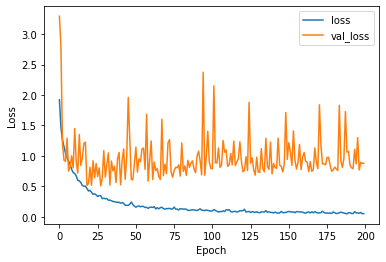

In [11]:
import matplotlib.pyplot as plt
# Plot the training loss
plt.plot(history.history["loss"],label = "loss")

# Plot the validation loss
plt.plot(history.history["val_loss"],label = "val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

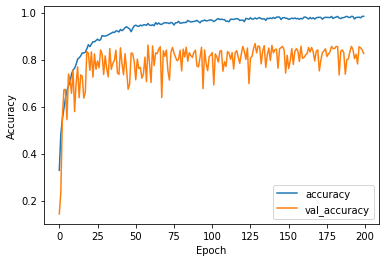

In [12]:
# Plot the training accuracy
plt.plot(history.history["accuracy"] , label="accuracy")

# Plot the validation accuracy
plt.plot(history.history["val_accuracy"] , label = "val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

Performance evaluation

In [38]:
# Evaluate the performance
model.evaluate(X_test , y_test)

28/28 [==============================] - 0s 7ms/step - loss: 0.8357 - accuracy: 0.8330


[0.8356905579566956, 0.8329519629478455]

Try a prediction

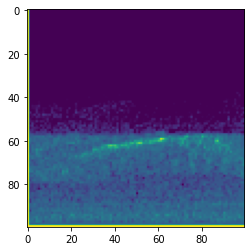

(100, 100, 1)


In [44]:
import tensorflow as tf
# Use the .imshow() function and show the plot
plt.imshow(( tf.squeeze(X_test[873]) ))

plt.show()
# Print the shape of the sample image
print(X_test[873].shape)

In [45]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[873].reshape(1,100,100,1))

# Print the prediction result
prediction_result

array([[4.0810714e-12, 1.7277845e-15, 4.8564732e-14, 7.0391474e-07,
        1.4188640e-15, 4.3075954e-15, 1.5674684e-12, 3.9301977e-15,
        9.9999928e-01, 3.0160526e-13]], dtype=float32)

In [46]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [48]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability")

This image belongs to class 8 with 0.9999992847442627 probability
